In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error

from lstm import lstm_model
from data_processing import generate_data

In [2]:
LOG_DIR = './ops_logs/sin'
TIMESTEPS = 3
RNN_LAYERS = [{'num_units': 5}]
DENSE_LAYERS = None
TRAINING_STEPS = 10000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

In [3]:

regressor = tf.contrib.learn.SKCompat(tf.contrib.learn.Estimator(
    model_fn=lstm_model(
        TIMESTEPS,
        RNN_LAYERS,
        DENSE_LAYERS
    ),
    model_dir=LOG_DIR
))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5ea33c7588>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './ops_logs/sin'}


In [4]:
X, y = generate_data(np.sin, np.linspace(0, 100, 10000, dtype=np.float32), TIMESTEPS, seperate=False)

# create a lstm instance and validation monitor
validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                     every_n_steps=PRINT_STEPS,
                                                     early_stopping_rounds=1000)
print(X['train'].shape)
print(y['train'].shape)
print(X['train'][0])
print(X['train'][1])

Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.
(8097, 3, 1)
(8097, 1)
[[ 0.        ]
 [ 0.01000083]
 [ 0.02000067]]
[[ 0.01000083]
 [ 0.02000067]
 [ 0.0299985 ]]


In [5]:
x_ = tf.unstack(X['train'], axis=1)
x2_ = tf.unstack(X['train'], axis=1, num=TIMESTEPS)
print(len(x_))
print(x_[0])

3
Tensor("unstack:0", shape=(8097, 1), dtype=float32)


In [6]:
regressor.fit(X['train'], y['train'], 
              monitors=[validation_monitor], 
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./ops_logs/sin/model.ckpt-100000
INFO:tensorflow:Saving checkpoints for 100001 into ./ops_logs/sin/model.ckpt.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estima

INFO:tensorflow:loss = 9.83958e-05, step = 103501 (0.177 sec)
INFO:tensorflow:global_step/sec: 712.239
INFO:tensorflow:loss = 9.33609e-05, step = 103601 (0.140 sec)
INFO:tensorflow:global_step/sec: 720.36
INFO:tensorflow:loss = 0.000111508, step = 103701 (0.139 sec)
INFO:tensorflow:global_step/sec: 717.022
INFO:tensorflow:loss = 9.30605e-05, step = 103801 (0.139 sec)
INFO:tensorflow:global_step/sec: 720.909
INFO:tensorflow:loss = 0.000100561, step = 103901 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.376
INFO:tensorflow:loss = 9.74998e-05, step = 104001 (0.141 sec)
INFO:tensorflow:global_step/sec: 712.447
INFO:tensorflow:loss = 0.000107853, step = 104101 (0.138 sec)
INFO:tensorflow:global_step/sec: 730.784
INFO:tensorflow:loss = 9.75885e-05, step = 104201 (0.137 sec)
INFO:tensorflow:global_step/sec: 732.395
INFO:tensorflow:loss = 0.000106213, step = 104301 (0.137 sec)
INFO:tensorflow:global_step/sec: 737.292
INFO:tensorflow:loss = 9.64612e-05, step = 104401 (0.136 sec)
INFO:tensorf

SKCompat()

In [7]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Restoring parameters from ./ops_logs/sin/model.ckpt-110000
MSE: 0.000096


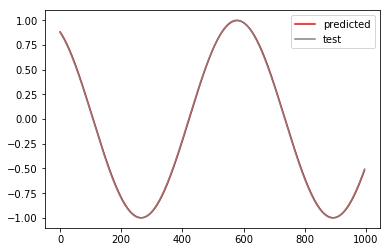

In [8]:
plot_predicted, = plt.plot(predicted, label='predicted', color="red")
plot_test, = plt.plot(y['test'], label='test',color="grey")
plt.legend(handles=[plot_predicted, plot_test])